In [2]:
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import dash
import geopandas as gpd
from matplotlib import pyplot as plt

# Read in Data
# https://www.orsanco.org/programs/bimonthly-water-quality-sampling/
# https://www.usgs.gov/centers/ohio-kentucky-indiana-water-science-center/science/ohio-streamgage-network
# https://waterdata.usgs.gov/nwis/dv/?referred_module=sw
RiverDF = pd.read_excel("F:\GIS\ohio-stuff\Bimonthly_Data_2000-2020.xlsx")
# USGS 03216600 OHIO RIVER AT GREENUP DAM NEAR GREENUP, KY Daily mean cubic feet per second
GreenupFlow = pd.read_csv('F:\GIS\ohio-stuff\Greenup-2020Flow.txt', sep='\t')


In [69]:
import datetime

## Completed functions

In [93]:
def graph_analytes(df, analytes):
    for a in analytes:
        g = df[df['Parameter (Units)']==a]
        plt.scatter(g.index, g['PublicData'])
    plt.show()

# Ohio River Data
1. Chemical data
2. Hydrographic data
    (https://waterdata.usgs.gov/oh/nwis/current/?type=flow)
3. tributaries
4. drainage basin .shp

# The Story

1. I have no clue what the story is
    - do I show how precipitation washed contaminants into the river?
    - do I show how industry pullutes the river?
    - I dunno?!
    
# Deliverables
1. Tables
2. Graph over time
    - Flow
    - Chemicals
3. Simple map
4. Complicated map??

In [3]:
RiverDF.head()

River  Confluence Mile Point Bimonthly SiteName  Latitude  Longitude  \
0  Ohio                   84.2        Pike Island  40.14972  -80.71389   
1  Ohio                   84.2        Pike Island  40.14972  -80.71389   
2  Ohio                   84.2        Pike Island  40.14972  -80.71389   
3  Ohio                   84.2        Pike Island  40.14972  -80.71389   
4  Ohio                   84.2        Pike Island  40.14972  -80.71389   

        Date Parameter (Units) PublicData Parameter Long Name  
0 2000-01-02         Al (ug/l)        140            Aluminum  
1 2000-01-02         Cd (ug/l)       <0.5             Cadmium  
2 2000-01-02        Cl- (mg/L)         20            Chloride  
3 2000-01-02         Cu (ug/l)        6.5              Copper  
4 2000-01-02         CN (ug/L)     <0.005             Cyanide

In [9]:
list(RiverDF)

['River',
 'Confluence Mile Point',
 'Bimonthly SiteName',
 'Latitude',
 'Longitude',
 'Date',
 'Parameter (Units)',
 'PublicData',
 'Parameter Long Name']

In [8]:
RiverDF['Bimonthly SiteName'].unique()

array(['Pike Island', 'Hannibal', 'Willow Island', 'Marietta',
       'Belleville', 'Meldahl', 'Newtown', 'Covington', 'Anderson Ferry',
       'Elizabethtown', 'Markland', 'Cannelton', 'Newburgh', 'Sebree',
       'J.T. Myers', 'Route 62 Bridge', 'Pittsburgh', 'South Pittsburgh',
       'Beaver Falls', 'New Cumberland', 'Smithland', 'Pinkneyville',
       'Paducah', 'L&D 52', 'Louisville', 'West Point', 'Louisa',
       'Greenup', 'Lucasville', 'Winfield', 'R.C. Byrd', 'McAlpine',
       'New Harmony', 'Olmsted'], dtype=object)

In [9]:
Parameters = RiverDF['Parameter (Units)'].unique()
Parameters

array(['Al (ug/l)', 'Cd (ug/l)', 'Cl- (mg/L)', 'Cu (ug/l)', 'CN (ug/L)',
       'pH (std.u.)', 'SpCond (umhos/cm)', 'Temp (°C)', 'Fe (ug/l)',
       'Pb (ug/l)', 'Mg (mg/l)', 'Mn (ug/l)', 'NH3-N (mg/L)',
       'NO2-NO3-N (mg/L)', 'DO (mg/L)', 'Phenols (ug/L)', 'TP (mg/L)',
       'SO4 (mg/L)', 'Hardness (mg/L)', 'TOC (mg/L)', 'TSS (mg/L)',
       'Zn (ug/l)', 'As (ug/l)', 'Ba (ug/l)', 'Cr (ug/l)', 'Cr6+ (ug/l)',
       'Hg (ug/l)', 'Ni (ug/l)', 'Se (ug/l)', 'Ag (ug/l)', 'TKN (mg/L)',
       'Chlorophyll', 'Turbidity', 'OrthoPhosphate (Dissolved mg/L)',
       'BOD (mg/L)', 'TDS (mg/L)', 'FOP (mV)', 'Bromide (mg/L)',
       'Total Nitrogen (mg/L)'], dtype=object)

In [16]:
RiverDF['Bimonthly SiteName'].unique()

array(['Pike Island', 'Hannibal', 'Willow Island', 'Marietta',
       'Belleville', 'Meldahl', 'Newtown', 'Covington', 'Anderson Ferry',
       'Elizabethtown', 'Markland', 'Cannelton', 'Newburgh', 'Sebree',
       'J.T. Myers', 'Route 62 Bridge', 'Pittsburgh', 'South Pittsburgh',
       'Beaver Falls', 'New Cumberland', 'Smithland', 'Pinkneyville',
       'Paducah', 'L&D 52', 'Louisville', 'West Point', 'Louisa',
       'Greenup', 'Lucasville', 'Winfield', 'R.C. Byrd', 'McAlpine',
       'New Harmony', 'Olmsted'], dtype=object)

## Greenup Dam 
- [ ] Isolate water year (10/01 - 9/30) 
- [ ] Flow data 
- [ ] Chemical data 
    - [Mass] * Charge / Molecular weight = equivalent concentration
- [ ] Plot data by date 
- [ ] Maucha diagram 
    - (https://matplotlib.org/3.5.0/gallery/specialty_plots/radar_chart.html) or (https://plotly.com/python/radar-chart/) 
         - carbonate, bicarbonate, chloride and sulphate are on the left, while the cations potassium, sodium, calcium and 
             magnesium 
### Stretch goals
- [ ] pourbaix plot
- [ ] Stiff diagram
    - Na, Ca, Mg (left) Cl, HCO3, SO4 (right)
- [ ] Piper diagram
- [ ] Ammonification / nitrification / denitrification

In [72]:
GreenupDF = RiverDF[RiverDF['Bimonthly SiteName']=='Greenup']

In [74]:
GreenupDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752 entries, 642 to 54255
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   River                  1752 non-null   object        
 1   Confluence Mile Point  1752 non-null   float64       
 2   Bimonthly SiteName     1752 non-null   object        
 3   Latitude               1752 non-null   float64       
 4   Longitude              1752 non-null   float64       
 5   Date                   1752 non-null   datetime64[ns]
 6   Parameter (Units)      1752 non-null   object        
 7   PublicData             1748 non-null   object        
 8   Parameter Long Name    1752 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 136.9+ KB


In [76]:
GreenupDF['Date'].dt.month

642       1
643       1
644       1
645       1
646       1
         ..
54251    11
54252    11
54253    11
54254    11
54255    11
Name: Date, Length: 1752, dtype: int64

In [90]:
GreenupDF.loc[GreenupDF['Date'] <= '2001-12-31']

River  Confluence Mile Point Bimonthly SiteName  Latitude  Longitude  \
642   Ohio                  341.0            Greenup  38.64694  -82.86028   
643   Ohio                  341.0            Greenup  38.64694  -82.86028   
644   Ohio                  341.0            Greenup  38.64694  -82.86028   
645   Ohio                  341.0            Greenup  38.64694  -82.86028   
646   Ohio                  341.0            Greenup  38.64694  -82.86028   
...    ...                    ...                ...       ...        ...   
8161  Ohio                  341.0            Greenup  38.64694  -82.86028   
8162  Ohio                  341.0            Greenup  38.64694  -82.86028   
8163  Ohio                  341.0            Greenup  38.64694  -82.86028   
8164  Ohio                  341.0            Greenup  38.64694  -82.86028   
8165  Ohio                  341.0            Greenup  38.64694  -82.86028   

           Date Parameter (Units) PublicData     Parameter Long Name  
642  2000-01-30         Al (ug/l)        250                Aluminum  
643  2000-01-30         As (ug/l)         <4                 Arsenic  
644  2000-01-30         Ba (ug/l)         36                  Barium  
645  2000-01-30         Cd (ug/l)       <0.5                 Cadmium  
646  2000-01-30        Cl- (mg/L)         24                Chloride  
...         ...               ...        ...                     ...  
8161 2001-11-07        SO4 (mg/L)        100                 Sulfate  
8162 2001-11-07   Hardness (mg/L)        170          Total Hardness  
8163 2001-11-07        TOC (mg/L)        2.9    Total Organic Carbon  
8164 2001-11-07        TSS (mg/L)          5  Total Suspended Solids  
8165 2001-11-07         Zn (ug/l)        <10                    Zinc  

[315 rows x 9 columns]

In [16]:
GreenupDF.tail()

River  Confluence Mile Point Bimonthly SiteName  Latitude  \
Date                                                                   
2020-11-12  Ohio                  341.0            Greenup  38.64694   
2020-11-12  Ohio                  341.0            Greenup  38.64694   
2020-11-12  Ohio                  341.0            Greenup  38.64694   
2020-11-12  Ohio                  341.0            Greenup  38.64694   
2020-11-12  Ohio                  341.0            Greenup  38.64694   

            Longitude      Parameter (Units) PublicData  \
Date                                                      
2020-11-12  -82.86028             TDS (mg/L)         88   
2020-11-12  -82.86028        Hardness (mg/L)        118   
2020-11-12  -82.86028  Total Nitrogen (mg/L)        1.3   
2020-11-12  -82.86028             TOC (mg/L)        3.7   
2020-11-12  -82.86028             TSS (mg/L)       17.3   

               Parameter Long Name  
Date                                
2020-11-12  Total Dissolved Solids  
2020-11-12          Total Hardness  
2020-11-12          Total Nitrogen  
2020-11-12    Total Organic Carbon  
2020-11-12  Total Suspended Solids

In [40]:
GreenupDF['Parameter (Units)'].unique() 

array(['Al (ug/l)', 'As (ug/l)', 'Ba (ug/l)', 'Cd (ug/l)', 'Cl- (mg/L)',
       'Cr (ug/l)', 'Cr6+ (ug/l)', 'Cu (ug/l)', 'pH (std.u.)',
       'SpCond (umhos/cm)', 'Temp (°C)', 'Fe (ug/l)', 'Pb (ug/l)',
       'Mg (mg/l)', 'Mn (ug/l)', 'Hg (ug/l)', 'Ni (ug/l)', 'NH3-N (mg/L)',
       'NO2-NO3-N (mg/L)', 'DO (mg/L)', 'Phenols (ug/L)', 'TP (mg/L)',
       'Se (ug/l)', 'Ag (ug/l)', 'SO4 (mg/L)', 'Hardness (mg/L)',
       'TOC (mg/L)', 'TSS (mg/L)', 'Zn (ug/l)', 'TKN (mg/L)', 'CN (ug/L)',
       'OrthoPhosphate (Dissolved mg/L)', 'TDS (mg/L)', 'Bromide (mg/L)',
       'Total Nitrogen (mg/L)', 'Turbidity'], dtype=object)

In [45]:
list(GreenupDF['Parameter (Units)'].unique())

['Al (ug/l)',
 'As (ug/l)',
 'Ba (ug/l)',
 'Cd (ug/l)',
 'Cl- (mg/L)',
 'Cr (ug/l)',
 'Cr6+ (ug/l)',
 'Cu (ug/l)',
 'pH (std.u.)',
 'SpCond (umhos/cm)',
 'Temp (°C)',
 'Fe (ug/l)',
 'Pb (ug/l)',
 'Mg (mg/l)',
 'Mn (ug/l)',
 'Hg (ug/l)',
 'Ni (ug/l)',
 'NH3-N (mg/L)',
 'NO2-NO3-N (mg/L)',
 'DO (mg/L)',
 'Phenols (ug/L)',
 'TP (mg/L)',
 'Se (ug/l)',
 'Ag (ug/l)',
 'SO4 (mg/L)',
 'Hardness (mg/L)',
 'TOC (mg/L)',
 'TSS (mg/L)',
 'Zn (ug/l)',
 'TKN (mg/L)',
 'CN (ug/L)',
 'OrthoPhosphate (Dissolved mg/L)',
 'TDS (mg/L)',
 'Bromide (mg/L)',
 'Total Nitrogen (mg/L)',
 'Turbidity']

In [96]:
GreenupDF['Parameter Long Name'].unique()

array(['Aluminum', 'Arsenic', 'Barium', 'Cadmium', 'Chloride', 'Chromium',
       'Chromium (hexavalent)', 'Copper', 'Field pH',
       'Field Specific Conductance', 'Field Temperature', 'Iron', 'Lead',
       'Magnesium', 'Manganese', 'Mercury', 'Nickel', 'Nitrogen, Ammonia',
       'Nitrogen, NO2 plus NO3', 'Oxygen, Dissolved',
       'Phenolics, Total Recoverable', 'Phosphorus', 'Selenium', 'Silver',
       'Sulfate', 'Total Hardness', 'Total Organic Carbon',
       'Total Suspended Solids', 'Zinc', 'Nitrogen, Kjeldahl, Total',
       'Cyanide', 'Phosphate, Ortho as P (Dissolved',
       'Total Dissolved Solids', 'Bromide', 'Total Nitrogen',
       'Field Turbidity'], dtype=object)

In [5]:
# GreenupDF.set_index('Date', inplace=True)
# Greenup2020 = GreenupDF.loc['2020-01-01':'2020-12-31']

In [95]:
mask20 = (GreenupDF['Date'] > '2020-01-01') & (GreenupDF['Date'] <= '2020-12-31') 
GreenupChem2 = GreenupDF.loc[mask20]
GreenupChem2.head(10)

River  Confluence Mile Point Bimonthly SiteName  Latitude  Longitude  \
52360  Ohio                  341.0            Greenup  38.64694  -82.86028   
52361  Ohio                  341.0            Greenup  38.64694  -82.86028   
52362  Ohio                  341.0            Greenup  38.64694  -82.86028   
52363  Ohio                  341.0            Greenup  38.64694  -82.86028   
52364  Ohio                  341.0            Greenup  38.64694  -82.86028   
52365  Ohio                  341.0            Greenup  38.64694  -82.86028   
52366  Ohio                  341.0            Greenup  38.64694  -82.86028   
52367  Ohio                  341.0            Greenup  38.64694  -82.86028   
52368  Ohio                  341.0            Greenup  38.64694  -82.86028   
52369  Ohio                  341.0            Greenup  38.64694  -82.86028   

            Date Parameter (Units) PublicData           Parameter Long Name  
52360 2020-01-14    Bromide (mg/L)      0.024                       Bromide  
52361 2020-01-14        Cl- (mg/L)       12.5                      Chloride  
52362 2020-01-14      NH3-N (mg/L)       0.03             Nitrogen, Ammonia  
52363 2020-01-14        TKN (mg/L)       0.15     Nitrogen, Kjeldahl, Total  
52364 2020-01-14  NO2-NO3-N (mg/L)       0.72        Nitrogen, NO2 plus NO3  
52365 2020-01-14    Phenols (ug/L)        <20  Phenolics, Total Recoverable  
52366 2020-01-14         TP (mg/L)      0.059                    Phosphorus  
52367 2020-01-14        SO4 (mg/L)       45.5                       Sulfate  
52368 2020-01-14        TDS (mg/L)        234        Total Dissolved Solids  
52369 2020-01-14   Hardness (mg/L)       86.8                Total Hardness

In [ ]:
na, mg, ca, so4, cl, co3

In [17]:
GreenupChem = GreenupDF.loc['2020-01-01':'2020-12-31']

In [26]:
GreenupTOC = GreenupChem[GreenupChem['Parameter (Units)']=='TOC (mg/L)']
GreenupCl = GreenupChem[GreenupChem['Parameter (Units)']=='Cl- (mg/L)']
GreenupTKN = GreenupChem[GreenupChem['Parameter (Units)']=='TKN (mg/L)']
GreenupMg = GreenupChem[GreenupChem['Parameter (Units)']=='Mg (mg/l)']

In [35]:
GreenupChem[GreenupChem['Parameter (Units)']=='Cl- (mg/L)']

River  Confluence Mile Point Bimonthly SiteName  Latitude  \
Date                                                                   
2020-01-14  Ohio                  341.0            Greenup  38.64694   
2020-05-07  Ohio                  341.0            Greenup  38.64694   
2020-07-08  Ohio                  341.0            Greenup  38.64694   
2020-09-17  Ohio                  341.0            Greenup  38.64694   
2020-11-12  Ohio                  341.0            Greenup  38.64694   

            Longitude Parameter (Units) PublicData Parameter Long Name  
Date                                                                    
2020-01-14  -82.86028        Cl- (mg/L)       12.5            Chloride  
2020-05-07  -82.86028        Cl- (mg/L)        8.1            Chloride  
2020-07-08  -82.86028        Cl- (mg/L)       21.8            Chloride  
2020-09-17  -82.86028        Cl- (mg/L)       20.8            Chloride  
2020-11-12  -82.86028        Cl- (mg/L)       32.3            Chloride

In [54]:
GreenupChem.index.unique()

DatetimeIndex(['2020-01-14', '2020-05-07', '2020-07-08', '2020-09-17',
               '2020-11-12'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [62]:
analytes = ['Cl- (mg/L)', 'pH (std.u.)', 'SpCond (umhos/cm)', 'Temp (°C)', 'Mn (ug/l)', 'DO (mg/L)', 'SO4 (mg/L)',
            'Hardness (mg/L)', 'TOC (mg/L)', 'TKN (mg/L)', 'Turbidity']
month = ['01-14', '05-07', '07-08', '09-17', '11-12']

In [65]:
GreenupChem[GreenupChem['Parameter (Units)']=='pH (std.u.)']

River  Confluence Mile Point Bimonthly SiteName  Latitude  \
Date                                                                   
2020-09-17  Ohio                  341.0            Greenup  38.64694   
2020-11-12  Ohio                  341.0            Greenup  38.64694   

            Longitude Parameter (Units) PublicData Parameter Long Name  
Date                                                                    
2020-09-17  -82.86028       pH (std.u.)       8.86            Field pH  
2020-11-12  -82.86028       pH (std.u.)        7.3            Field pH

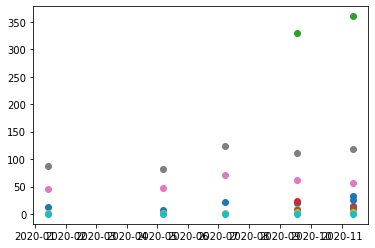

In [94]:
graph_analytes(GreenupChem, analytes)

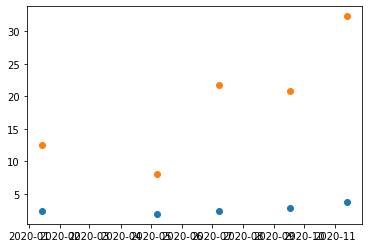

In [42]:
plt.scatter(GreenupTOC.index, GreenupTOC.PublicData)
plt.scatter(GreenupCl.index, GreenupCl.PublicData)
plt.show()

### Greenup Dam Flow Data

In [13]:
GreenupFlow.head()

agency_cd   site_no    datetime 213292_00060_00003 213292_00060_00003_cd
0        5s       15s         20d                14n                   10s
1      USGS  03216600  2020-01-01             140000                     A
2      USGS  03216600  2020-01-02             127000                     A
3      USGS  03216600  2020-01-03             120000                     A
4      USGS  03216600  2020-01-04             154000                     A

In [10]:
list(GreenupFlow)

['agency_cd',
 'site_no',
 'datetime',
 '213292_00060_00003_cfs_mean',
 '213292_00060_00003_cd_Approval']

In [40]:
GreenupFlow['datetime'].head()

0    2020-01-01
1    2020-01-02
2    2020-01-03
3    2020-01-04
4    2020-01-05
Name: datetime, dtype: object

In [48]:
GreenupFlow.rename(columns={'agency_cd':'Agency',
 'site_no': 'Site',
 'datetime': 'Date',
 '213292_00060_00003_cfs_mean':'AvgFlow',
 '213292_00060_00003_cd_Approval':'Approved'}, inplace=True)

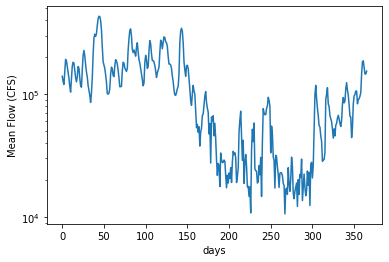

In [57]:
plt.semilogy(GreenupFlow['AvgFlow'])
plt.ylabel('Mean Flow (CFS)')
plt.xlabel('days')
plt.show()

## Pike Island

In [3]:
PikeIsl = RiverDF[RiverDF['Bimonthly SiteName'] == 'Pike Island']

In [26]:
fig = go.Figure()
for parameter, data in PikeIsl.groupby('Parameter (Units)'):
    fig.add_trace(go.Scatter(x=PikeIsl.Date, y=data.PublicData, name=parameter))
fig.show()

In [43]:
# carve out same unit paramters
ugL_params = []
mgL_params = []
misc = []
for param in Parameters:
    if 'ug/' in param:
        ugL_params.append(param)
    elif 'mg/' in param:
        mgL_params.append(param)
    else:
        misc.append(param)
# misc

['pH (std.u.)',
 'SpCond (umhos/cm)',
 'Temp (°C)',
 'Chlorophyll',
 'Turbidity',
 'FOP (mV)']

In [49]:
# copy DataFrame based on units
PikeugLDF = PikeIsl[PikeIsl['Parameter (Units)'].isin(ugL_params)]
PikemgLDF = PikeIsl[PikeIsl['Parameter (Units)'].isin(mgL_params)]

In [52]:
figug = go.Figure(layout_yaxis_range=[0,1500])
# why is the y axis all messed up? does it not like <?
for parameter, data in PikeugLDF.groupby('Parameter (Units)'):
    figug.add_trace(go.Scatter(x=PikeugLDF.Date, y=data.PublicData, name=parameter))
figug.show()

In [68]:
figmg = go.Figure() # layout_yaxis_range=[0,1500])
for parameter, data in PikemgLDF.groupby('Parameter Long Name'):
    figmg.add_trace(go.Scatter(x=PikemgLDF.Date, y=data.PublicData, mode='markers', name=parameter))
    
figmg.show()

In [61]:
PikemgLDF[PikemgLDF['Parameter (Units)'] == 'Mg (mg/l)']

River  Confluence Mile Point Bimonthly SiteName  Latitude  Longitude  \
10     Ohio                   84.2        Pike Island  40.14972  -80.71389   
772    Ohio                   84.2        Pike Island  40.14972  -80.71389   
1569   Ohio                   84.2        Pike Island  40.14972  -80.71389   
6656   Ohio                   84.2        Pike Island  40.14972  -80.71389   
7379   Ohio                   84.2        Pike Island  40.14972  -80.71389   
8315   Ohio                   84.2        Pike Island  40.14972  -80.71389   
9154   Ohio                   84.2        Pike Island  40.14972  -80.71389   
9821   Ohio                   84.2        Pike Island  40.14972  -80.71389   
10455  Ohio                   84.2        Pike Island  40.14972  -80.71389   

            Date Parameter (Units) PublicData Parameter Long Name  
10    2000-01-02         Mg (mg/l)        6.6           Magnesium  
772   2000-03-13         Mg (mg/l)          6           Magnesium  
1569  2000-05-08         Mg (mg/l)        7.2           Magnesium  
6656  2001-07-12         Mg (mg/l)         12           Magnesium  
7379  2001-09-17         Mg (mg/l)         11           Magnesium  
8315  2001-11-12         Mg (mg/l)         11           Magnesium  
9154  2002-01-17         Mg (mg/l)         10           Magnesium  
9821  2002-03-14         Mg (mg/l)        9.5           Magnesium  
10455 2002-05-09         Mg (mg/l)        6.4           Magnesium

In [64]:
# operations check 
for parameter, publicdata in PikeIsl.groupby('Parameter Long Name'):
    print(publicdata.PublicData)

0        140
759      830
1560     130
6643     <10
7370     112
8301     <10
9144     <10
9807     133
10446    594
Name: PublicData, dtype: object
760     <4
6644    <3
8302    <3
9808    <3
Name: PublicData, dtype: object
761       44
6645     <10
8303    64.5
9809    41.3
Name: PublicData, dtype: object
36576       NaN
36825      <2.5
37611      <0.5
37681        <1
38457     0.079
38752     0.118
39135     0.076
39401     0.053
39891     0.035
40207     0.067
40856     0.056
41065     0.122
41603     0.073
42123     0.065
42410     0.051
43109     0.092
43465      0.12
44352     0.052
44911    <0.011
45225    <0.011
45498    <0.021
45989     0.099
46516    <0.021
46905    <0.014
47372     0.054
47864    <0.014
48250     0.056
48695    <0.014
49039    <0.011
49328    <0.014
50029     <0.05
50596     0.035
50926     0.045
51397     0.074
51749      0.04
52286     0.024
52837     <0.05
53085     <0.05
53244     0.086
53688     0.099
54288      79.8
Name: PublicData, dtype: object
1  

In [66]:
# Sub-optimal implementation
PINitrogen = PikeIsl[PikeIsl['Parameter (Units)'] == 'NO2-NO3-N (mg/L)'] #
PIDO = PikeIsl[PikeIsl['Parameter (Units)'] == 'DO (mg/L)'] #
PITurb = PikeIsl[PikeIsl['Parameter (Units)'] == 'Turbidity'] #
PINH3 = PikeIsl[PikeIsl['Parameter (Units)'] == 'NH3-N (mg/L)'] #
PITOC = PikeIsl[PikeIsl['Parameter (Units)'] == 'TOC (mg/L)'] #
PISO4 = PikeIsl[PikeIsl['Parameter (Units)'] == 'SO4 (mg/L)'] #
PITDS = PikeIsl[PikeIsl['Parameter (Units)'] == 'TDS (mg/L)']
PIpH = PikeIsl[PikeIsl['Parameter (Units)'] == 'pH (std.u.)']
figall = go.Figure()
figall.add_trace(go.Scatter(x=PIDO.Date, y=PIDO['PublicData'],name='DO'))
figall.add_trace(go.Scatter(x=PITurb.Date, y=PITurb['PublicData'],name='Turbidity'))
figall.add_trace(go.Scatter(x=PINH3.Date, y=PINH3['PublicData'],name='NH3'))
figall.add_trace(go.Scatter(x=PITOC.Date, y=PITOC['PublicData'],name='TOC'))
figall.add_trace(go.Scatter(x=PISO4.Date, y=PISO4['PublicData'],name='SO4'))
figall.add_trace(go.Scatter(x=PITDS.Date, y=PITDS['PublicData'],name='TDS'))
figall.add_trace(go.Scatter(x=PIpH.Date, y=PIpH['PublicData'],name='pH'))
figall.show()

In [36]:
figTDS = go.Figure(data=go.Scatter(x=PITDS.Date , y=PITDS['PublicData']))
figTDS.show()